In [12]:
'''
Detailed analysis of the predictions
1. Runtime bracket
2. Probability change
3. Top 2 with runtime within 5% as correct
'''
%matplotlib inline

import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sc_label_file = '/home/vincent/sat/sc_labels.csv'
sc_label = pd.read_csv(sc_label_file)


/tmp/ipykernel_13381/4099113462.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_label['min_id'] = min_id


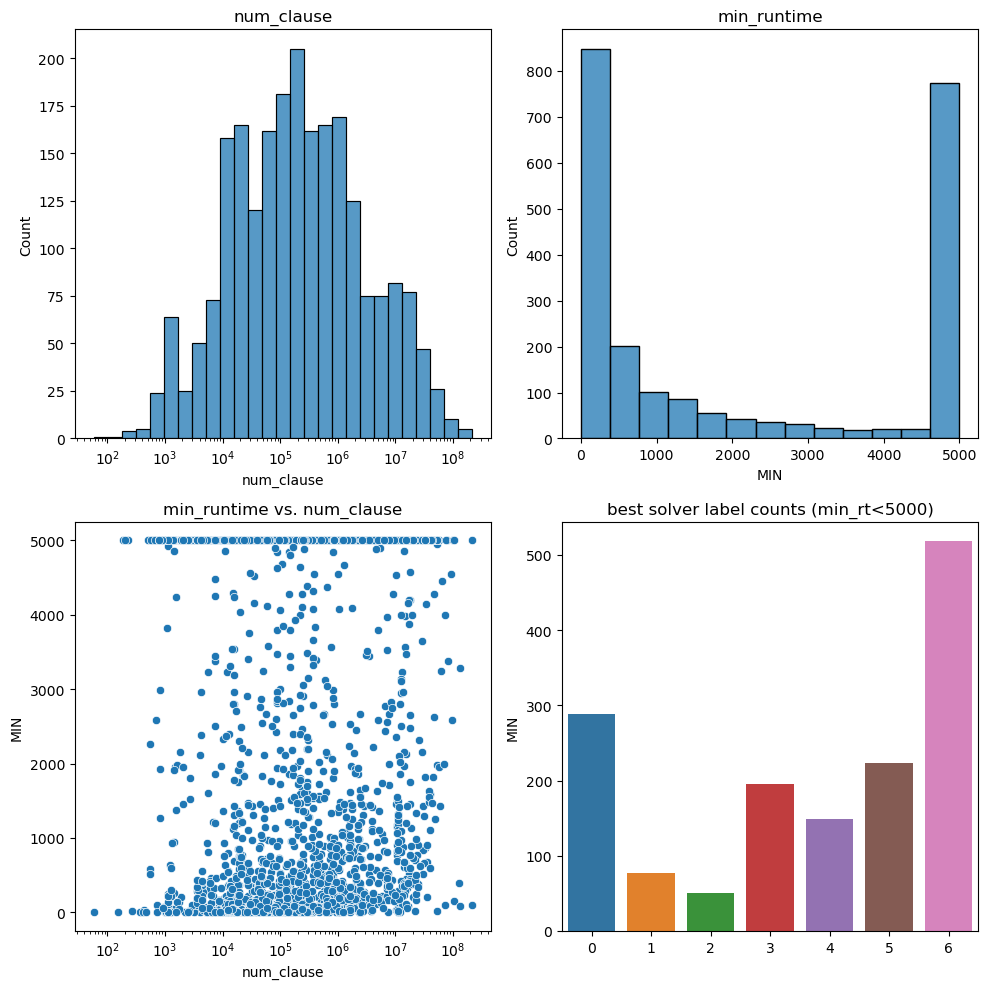

In [41]:
# sbn.boxplot(sc_label, y='num_clause')
save_dir = '/home/vincent/sat/sat_selection_light/data/sc_dataset'

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#create chart in each subplot
sns.histplot(sc_label, x='num_clause', log_scale=True, ax=axes[0,0])
axes[0, 0].set_title('num_clause')
# sns.histplot(sc_label, x='num_var', log_scale=True, ax=axes[0,1])
# axes[0, 1].set_title('num_var')
sns.histplot(sc_label, x='MIN', ax=axes[0,1])
axes[0, 1].set_title('min_runtime')
sns.scatterplot(sc_label, x='num_clause', y='MIN', ax=axes[1, 0])
axes[1, 0].set_title('min_runtime vs. num_clause')
axes[1, 0].set_xscale('log')

filtered_label = sc_label[sc_label['MIN']<5000]
runtimes = filtered_label.to_numpy()[:, 3:-1]
min_id = runtimes.argmin(axis=-1)
filtered_label['min_id'] = min_id
label_counts = filtered_label.groupby('min_id')['MIN'].count()
sns.barplot(x=np.arange(7), y=label_counts, ax=axes[1, 1])
axes[1, 1].set_title('best solver label counts (min_rt<5000)')

fig.tight_layout()
plt.savefig(os.path.join(save_dir, 'data_distribution.png'))
plt.show()
plt.close()

In [33]:
runtimes = sc_label.to_numpy()[:, 3:-1]
min_id = runtimes.argmin(axis=-1)
sc_label['min_id'] = min_id
counts = sc_label.groupby('min_id')['MIN'].count()
print(runtimes[0])
print(min_id[0])
print(counts)

[5000.0 5000.0 5000.0 5000.0 5000.0 4065.62 5000.0 4065.62]
5
min_id
0    1043
1      77
2      50
3     196
4     149
5     223
6     518
Name: MIN, dtype: int64


In [39]:
runtimes = sc_label[sc_label['MIN']<5000].to_numpy()[:, 3:-1]
print(runtimes[0])

[5000.0 5000.0 5000.0 5000.0 5000.0 4065.62 5000.0 4065.62]
